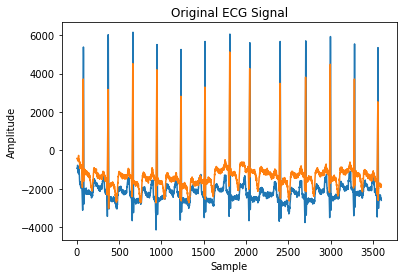

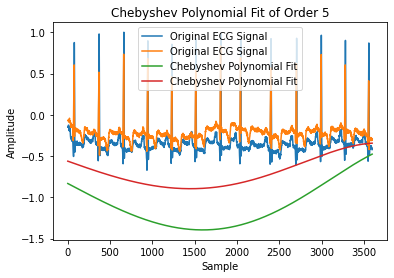

RMSE of Chebyshev polynomial fit of order 5: 0.6960935825340184


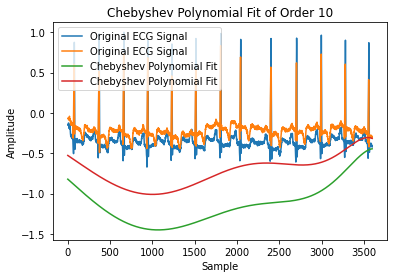

RMSE of Chebyshev polynomial fit of order 10: 0.7178912125489221


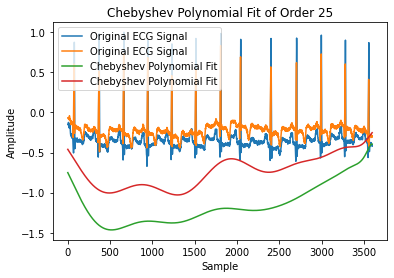

RMSE of Chebyshev polynomial fit of order 25: 0.7332255346023323


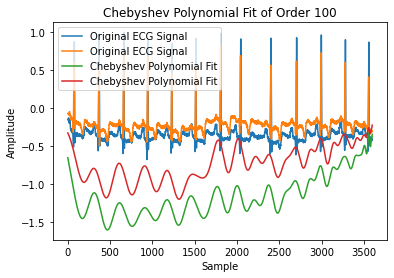

RMSE of Chebyshev polynomial fit of order 100: 0.7393511602492983


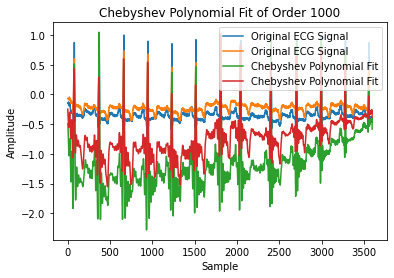

RMSE of Chebyshev polynomial fit of order 1000: 0.7550292765332338


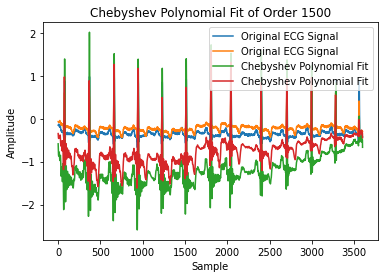

RMSE of Chebyshev polynomial fit of order 1500: 0.7611197056149558


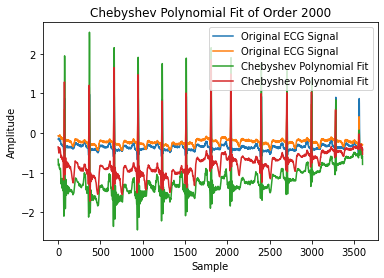

RMSE of Chebyshev polynomial fit of order 2000: 0.7631515599595826


In [52]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Chebyshev polynomial
orders = [5, 10, 25, 100, 1000,1500,2000]

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Fit the normalized ECG signal using Chebyshev polynomial of different orders
for i, order in enumerate(orders):
    # Define the Chebyshev polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    C = np.array([np.cos(j * np.arccos(t)) for j in range(order+1)]).T

    # Compute the coefficients of the Chebyshev polynomial
    coeffs = np.dot(C.T, ecg_norm) / (len(ecg_norm) / 2)

    # Evaluate the Chebyshev polynomial on the signal domain
    y_fit = np.dot(C, coeffs)

    # Plot the fitted signal using the Chebyshev polynomial
    plt.figure()
    plt.plot(ecg_norm, label='Original ECG Signal')
    plt.plot(y_fit, label='Chebyshev Polynomial Fit')
    plt.title(f'Chebyshev Polynomial Fit of Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Chebyshev polynomial fit of order {order}: {rmse}")
    
    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break


In [ ]:
#Chebyshev Version 2
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Chebyshev polynomial
orders = [5, 10, 25, 100, 1000, 1500, 2000]

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Define the full signal domain
t_full = np.linspace(0, 1, len(ecg_10s))

# Fit the normalized ECG signal using Chebyshev polynomial of different orders
for i, order in enumerate(orders):
    # Define the Chebyshev polynomial basis
    C = np.array([np.cos(j * np.arccos(t_full)) for j in range(order+1)]).T

    # Compute the coefficients of the Chebyshev polynomial
    coeffs = np.dot(C.T, ecg_norm) / (len(ecg_norm) / 2)

    # Evaluate the Chebyshev polynomial on the signal domain
    y_fit = np.dot(C, coeffs)

    # Plot the fitted signal using the Chebyshev polynomial
    plt.figure()
    plt.plot(ecg_norm, label='Original ECG Signal')
    plt.plot(y_fit, label='Chebyshev Polynomial Fit')
    plt.title(f'Chebyshev Polynomial Fit of Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Chebyshev polynomial fit of order {order}: {rmse}")
    
    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break


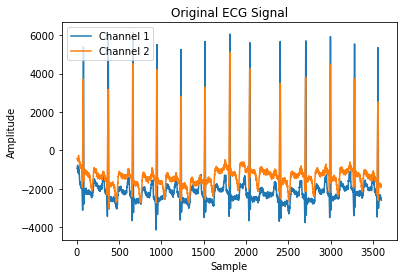

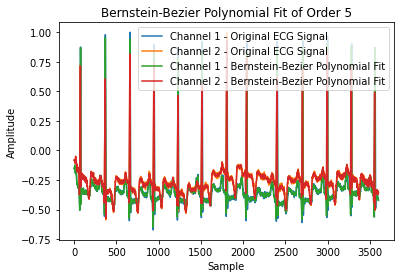

RMSE of Bernstein-Bezier polynomial fit of order 5: 0.09874081106219385


In [21]:
#Bernstein-Bezier Curve


import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal from both channels
ecg_10s = ecg[:10*fs, :]

# Define the order of the Bernstein-Bezier polynomial
orders = [5, 10, 25, 100, 1000]

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s[:, 0], label='Channel 1')
plt.plot(ecg_10s[:, 1], label='Channel 2')
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Normalize the ECG signal to be between -1 and 1 for both channels
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s), axis=0)

# Fit the normalized ECG signal using Bernstein-Bezier polynomial of different orders for both channels
for i, order in enumerate(orders):
    # Define the Bernstein-Bezier polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    control_points = np.zeros((len(ecg_norm), 2, 2))
    control_points[:, :, 0] = t.reshape(-1, 1)
    control_points[:, :, 1] = ecg_norm
    for j in range(1, order):
        for k in range(len(control_points) - j):
            control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]
    y_fit = control_points[:, :, 1]

    # Plot the fitted signal using the Bernstein-Bezier polynomial for both channels
    plt.figure()
    plt.plot(ecg_norm[:, 0], label='Channel 1 - Original ECG Signal')
    plt.plot(ecg_norm[:, 1], label='Channel 2 - Original ECG Signal')
    plt.plot(y_fit[:, 0], label='Channel 1 - Bernstein-Bezier Polynomial Fit')
    plt.plot(y_fit[:, 1], label='Channel 2 - Bernstein-Bezier Polynomial Fit')
    plt.title(f'Bernstein-Bezier Polynomial Fit of Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein-Bezier polynomial fit of order {order}: {rmse}")

    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break


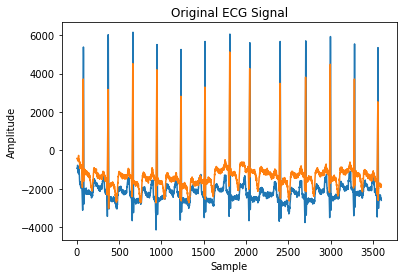

ValueError: shapes (3600,6) and (1,12) not aligned: 6 (dim 1) != 1 (dim 0)

In [49]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Bernstein polynomial
orders = [5,10,25,100,1000]

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Set the AES key and initialization vector (IV)
key = b'Sixteen byte key'
iv = b'InitializationVe'

# Fit the normalized ECG signal using Bernstein polynomial of different orders
for i, order in enumerate(orders):
    # Define the Bernstein polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

    # Compute the coefficients of the Bernstein polynomial
    coeffs = np.linalg.lstsq(np.asarray(B.T, dtype=np.float64), np.asarray(ecg_norm, dtype=np.float64), rcond=None)[0]

    # Encrypt the coefficients using AES
    cipher = AES.new(key, AES.MODE_CBC, iv)
    coeffs_encrypted = cipher.encrypt(pad(coeffs.tobytes(), AES.block_size))

    # Decrypt the coefficients
    cipher = AES.new(key, AES.MODE_CBC, iv)
    coeffs_decrypted = np.frombuffer(unpad(cipher.decrypt(coeffs_encrypted), AES.block_size), dtype=np.float64)

    # Evaluate the Bernstein polynomial on the signal domain using the decrypted coefficients
    coeffs_decrypted_reshaped = coeffs_decrypted.reshape((coeffs_decrypted.shape[0], 1))
    y_fit_decrypted = np.dot(B.T, np.transpose(coeffs_decrypted_reshaped))




    # Plot the fitted signal using the Bernstein polynomial
    plt.figure()
    plt.plot(ecg_norm, label='Original ECG Signal')
    plt.plot(y_fit, label='Bernstein Polynomial Fit')
    plt.title(f'Bernstein Polynomial Fit of Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein polynomial fit of order {order}: {rmse}")

    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break

    # Compute the margin of error between the decrypted coefficients and the original coefficients
    error = np.max(np.abs(coeffs - coeffs_decrypted))
    print(f"Margin of error: {error}")


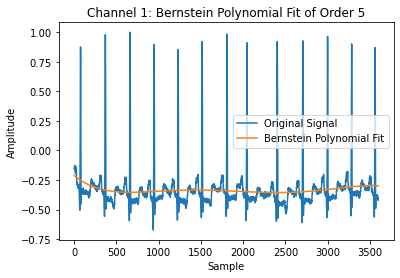

Channel 1: RMSE of Bernstein polynomial fit of order 5: 0.17555768650465017


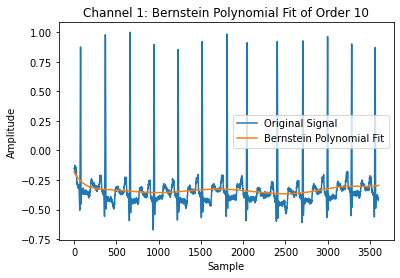

Channel 1: RMSE of Bernstein polynomial fit of order 10: 0.17533601487463493


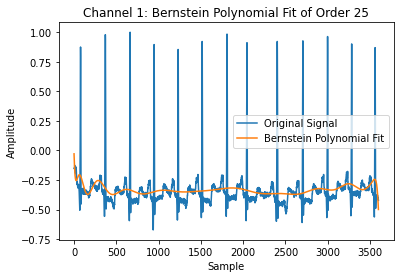

Channel 1: RMSE of Bernstein polynomial fit of order 25: 0.17397536764126664


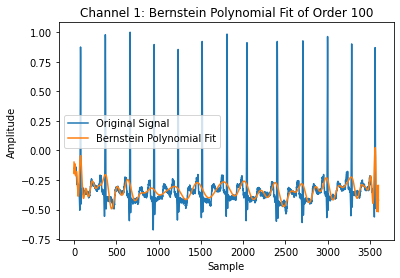

Channel 1: RMSE of Bernstein polynomial fit of order 100: 0.16523885318209977


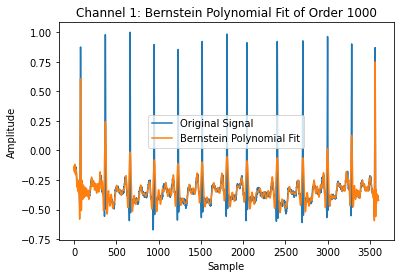

Channel 1: RMSE of Bernstein polynomial fit of order 1000: 0.13417458197397436


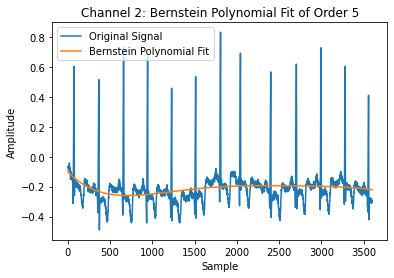

Channel 2: RMSE of Bernstein polynomial fit of order 5: 0.12465702486561372


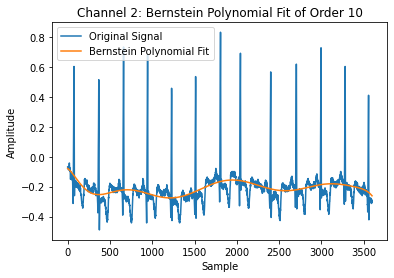

Channel 2: RMSE of Bernstein polynomial fit of order 10: 0.12215181482777711


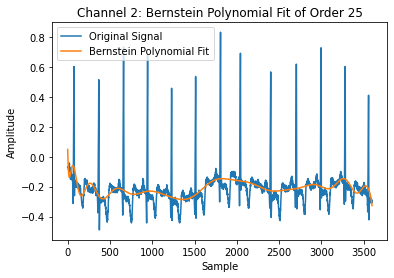

Channel 2: RMSE of Bernstein polynomial fit of order 25: 0.12004645738943204


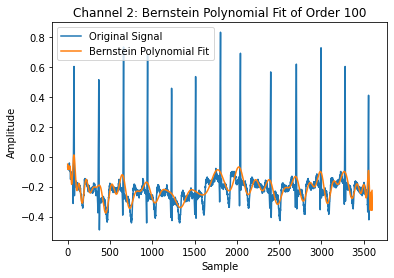

Channel 2: RMSE of Bernstein polynomial fit of order 100: 0.10974091179602455


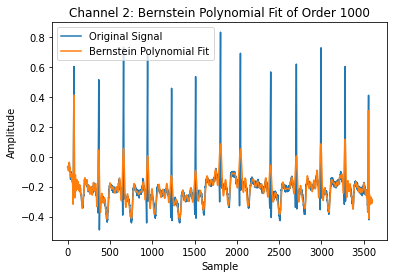

Channel 2: RMSE of Bernstein polynomial fit of order 1000: 0.0881752594496597


In [50]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, data = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of each channel
data_10s = data[:10*fs,:]

# Define the order of the Bernstein polynomial
orders = [5,10,25,100,1000]

# Normalize the data to be between -1 and 1
data_norm = data_10s / np.max(np.abs(data_10s))

# Fit a separate Bernstein polynomial to each channel
coeffs = []
for ch in range(data_norm.shape[1]):
    ch_coeffs = []
    for i, order in enumerate(orders):
        # Define the Bernstein polynomial basis
        t = np.linspace(0, 1, len(data_norm))
        B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

        # Compute the coefficients of the Bernstein polynomial for the current channel
        channel_coeffs = np.linalg.lstsq(np.asarray(B.T, dtype=np.float64), np.asarray(data_norm[:, ch], dtype=np.float64), rcond=None)[0]
        ch_coeffs.append(channel_coeffs)

        # Evaluate the Bernstein polynomial on the signal domain for the current channel
        y_fit = np.dot(B.T, channel_coeffs)

        # Plot the fitted signal using the Bernstein polynomial for the current channel
        plt.figure()
        plt.plot(data_norm[:, ch], label='Original Signal')
        plt.plot(y_fit, label='Bernstein Polynomial Fit')
        plt.title(f'Channel {ch+1}: Bernstein Polynomial Fit of Order {order}')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()

        # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal for the current channel
        rmse = np.sqrt(np.mean((data_norm[:, ch] - y_fit)**2))
        print(f"Channel {ch+1}: RMSE of Bernstein polynomial fit of order {order}: {rmse}")

        # Stop fitting when the RMSE is below a threshold value for the current channel
        if rmse < 0.1:
            break
    coeffs.append(ch_coeffs)

# Write the coefficients of the Bernstein polynomial for each channel to a text file
with open('coeffs.txt', 'w') as f:
    for ch in range(data_norm.shape[1]):
        f.write(f'Channel {ch+1} coefficients:\n')
        for i, order in enumerate(orders):
            f.write(f'Order {order}:\n')
            f.write(f'{coeffs[ch][i]}\n')
        f.write('\n')


In [4]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Bernstein polynomial
orders = [5,10,25,100,1000]

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Initialize variables to keep track of the minimum RMSE and corresponding coefficients
min_rmse = np.inf
min_coeffs = None

# Fit the normalized ECG signal using Bernstein polynomial of different orders
for i, order in enumerate(orders):
    # Define the Bernstein polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

    # Compute the coefficients of the Bernstein polynomial
    coeffs = np.linalg.lstsq(np.asarray(B.T, dtype=np.float64), np.asarray(ecg_norm, dtype=np.float64), rcond=None)[0]

    # Evaluate the Bernstein polynomial on the signal domain
    y_fit = np.dot(B.T, coeffs)

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein polynomial fit of order {order}: {rmse}")
    
    # Update the minimum RMSE and corresponding coefficients if the current RMSE is lower
    if rmse < min_rmse:
        min_rmse = rmse
        min_coeffs = coeffs
    
    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break
        
with open('bernstein_coeffs.txt', 'w') as f:
    for i in range(len(min_coeffs)):
        f.write(f"{min_coeffs[i][0]} {min_coeffs[i][1]}\n")



RMSE of Bernstein polynomial fit of order 5: 0.1522495897190059
RMSE of Bernstein polynomial fit of order 10: 0.15110225673006633
RMSE of Bernstein polynomial fit of order 25: 0.149463340785725
RMSE of Bernstein polynomial fit of order 100: 0.1402621580789655
RMSE of Bernstein polynomial fit of order 1000: 0.11352906076321949


In [32]:
print(ecg)

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [-4320 -2336]
 [-4896 -2144]
 [-8192     0]]


In [5]:
print(min_coeffs)

[[-1.51089358e-01 -6.76919656e-02]
 [ 5.60953835e+01 -2.89842280e+00]
 [-1.15878572e+03  4.91803674e+01]
 ...
 [-6.18173385e+02 -2.90068008e+02]
 [ 2.83587041e+01  1.43886352e+01]
 [-4.21863266e-01 -2.96897291e-01]]


In [6]:
len(min_coeffs)

1001

In [41]:
# Define the order of the Bernstein polynomial to be the same as the order used to fit the signal
order = len(min_coeffs) - 1

# Define the Bernstein polynomial basis
t = np.linspace(0, 1, len(ecg_10s))
B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

# Compute the reconstructed signal
y_rec = np.dot(B.T, min_coeffs)

# Rescale the reconstructed signal to the original amplitude range
y_rec = y_rec * np.max(np.abs(ecg_10s))

# Reshape the reconstructed signal to a 2D array with 2 columns to represent the two channels of the ECG signal
y_rec = y_rec.reshape((-1, 2))
y_og=y_rec

In [6]:
print(y_rec)

[[-928.293018013864 -415.8994368621396]
 [-923.3503147032595 -417.30976861096156]
 [-956.6838787621639 -408.54971770400607]
 ...
 [-2490.7171504253074 -1895.8507203367888]
 [-2561.3462927184673 -1854.7794673778674]
 [-2591.9279055519823 -1824.1369543475453]]


In [87]:
from Crypto.Cipher import AES
import numpy as np

# Read the file and extract the coefficients
with open('bernstein_coeffs.txt', 'r') as f:
    coeffs_str = f.read().replace('\n', ' ').replace('[','').replace(']','').replace(',','').strip()
coeffs_og = np.fromstring(coeffs_str, dtype=float, sep=' ')

# Define the AES encryption key and initialization vector
key = b'mysecretpassword'
iv = b'initialvector123'

# Convert the coefficients to bytes and pad the input
input_bytes = coeffs_og.tobytes()
padding_length = (8 - len(input_bytes) % 8) % 8
input_bytes += bytes([padding_length]) * padding_length


# Create an AES encryption object and encrypt the input
aes = AES.new(key, AES.MODE_CBC, iv)
encrypted = aes.encrypt(input_bytes)

# Print the original and encrypted coefficients
print('Original coefficients:', coeffs_og)
print('Encrypted bytes:', encrypted)
with open('encrypted_coeffs.bin', 'wb') as f:
    f.write(encrypted)

Original coefficients: [-0.1510961  -0.06769198 56.10723083 ... 14.39001401 -0.42185565
 -0.29688061]
Encrypted bytes: b'\xb9Q\xc6\xd1\xb0\xe2\x93\xa6\xc5\xd9o\xccr]iB\xaeN\xdb0\xe8\x96\xc3\x03M\xabI\x17\xd1(\xa9-\xd6\x15\xffA\xfeK\xc8\x89\xb1b\xe5\x1d\xc6A\x9b\xe8\x04\x08\x06=\x05K\x84\xc6\xb5\x00\x82\xad\xb2\x8b(?\xc3mf;\\\xfc\x0e\xed>\x7f\x0f\xe9=\xb9a\xcf\xa5.k\xdb\x1evW\x84\xdc\x87\xb3\n\xc79\x12\x86\xdd\x19\xc1F\xc9\x98\x1c\xe1\xe2\x89\xe6c\x19\xd0\x02\x96\xbc\x85J#\xd0\xa0\xfb,F\x951\xee\x8f\xbc\x9e\x91A8t\xa1$;\n\xfe\x9a\x10\x93`\xcb\xd2\xb5[\x0f\x0b\x1a\xed\xd688\x1b\xf9\xe7v;r\x97p%\xd9\xd3\x13+\xec\xc3\xb1\xbb{\xcd\xad\x82\x02\xac\x9f\x8c\x99\x1b\xb5$,[\xa2\xc8az%\rc\r\x00g?\x80o\xd9\x8a\xa5b\xeco#|**}\x85o\xfb\x87b\xa8\xa5G\xd3\xc4\x91[\x8ewH\xf8&4\xa5i\xa2E\xe1\xef"\x837\xd0d\xe9\xa5 \x16\x0e\x01n\xc7\x97\xa4\xda\xf6\xcf\xaa\xba\r|7\xf0\x97(\xc5"xt\x91\xa9\xee\xc7\x9e\x08\x84\xb2cOT\x89\xfc\xed/\xd2<\x92n\x85\x95\xfdC\xf7\x82\x03U\xa9L\xffw9\x1aO\x03\xc6\x06\xfe\xb0|\xb4z\

In [72]:


with open('encrypted_coeffs.bin', 'wb') as f:
    f.write(encrypted)

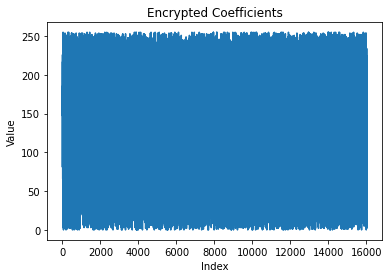

In [59]:
import matplotlib.pyplot as plt

# Convert the encrypted bytes to a list of integers
encrypted_ints = [int(b) for b in encrypted]

# Plot the encrypted integers
plt.plot(encrypted_ints)
plt.title('Encrypted Coefficients')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


In [79]:
from Crypto.Cipher import AES
import numpy as np

# Define the AES encryption key and initialization vector
key = b'mysecretpassword'
iv = b'initialvector123'

# Read the encrypted coefficients from the file
with open('encrypted_coeffs.txt', 'rb') as f:
    encrypted = f.read()

# Create an AES decryption object and decrypt the input
aes = AES.new(key, AES.MODE_CBC, iv)
decrypted_bytes = aes.decrypt(encrypted)

# Remove the padding from the decrypted bytes
padding_length = decrypted_bytes[-1]
decrypted_bytes = decrypted_bytes[:-padding_length]

# Pad the decrypted bytes to a multiple of 8 bytes
remainder = len(decrypted_bytes) % 8
if remainder != 0:
    decrypted_bytes += b' ' * (8 - remainder)

# Convert the decrypted bytes to a NumPy array of floating-point values
coeffs = np.frombuffer(decrypted_bytes, dtype=np.float64)

# Print the original and decrypted coefficients
print('Original coefficients:', coeffs_og)
print('Decrypted coefficients:', coeffs)


Original coefficients: [-0.1510961  -0.06769198 56.10723083 ... 14.39001401 -0.42185565
 -0.29688061]
Decrypted coefficients: [-1.51096097e-001 -6.76919838e-002  5.61072308e+001 ... -6.71905874e+009
  5.59637233e+008  6.01347002e-154]


In [81]:
# Compare the original and decrypted coefficients
mse = np.mean((coeffs_og - coeffs) ** 2)

# Print the mean squared error
print('Mean squared error:', mse)


ValueError: operands could not be broadcast together with shapes (2002,) (1979,) 

In [84]:
from Crypto.Cipher import AES
import numpy as np

# Read the file and extract the coefficients
with open('bernstein_coeffs.txt', 'r') as f:
    coeffs_str = f.read().replace('\n', ' ').replace('[','').replace(']','').replace(',','').strip()
coeffs = np.fromstring(coeffs_str, dtype=float, sep=' ')

# Define the AES encryption key and initialization vector
key = b'mysecretpassword'
iv = b'initialvector123'

# Convert the coefficients to bytes
input_bytes = coeffs.tobytes()

# Add padding to the input bytes
padding_length = (8 - len(input_bytes) % 8) % 8
input_bytes += bytes([padding_length]) * padding_length

# Create an AES encryption object and encrypt the input
aes = AES.new(key, AES.MODE_CBC, iv)
encrypted = aes.encrypt(input_bytes)

# Print the original and encrypted coefficients
print('Original coefficients:', coeffs)
print('Encrypted bytes:', encrypted)


Original coefficients: [-0.1510961  -0.06769198 56.10723083 ... 14.39001401 -0.42185565
 -0.29688061]
Encrypted bytes: b'\xb9Q\xc6\xd1\xb0\xe2\x93\xa6\xc5\xd9o\xccr]iB\xaeN\xdb0\xe8\x96\xc3\x03M\xabI\x17\xd1(\xa9-\xd6\x15\xffA\xfeK\xc8\x89\xb1b\xe5\x1d\xc6A\x9b\xe8\x04\x08\x06=\x05K\x84\xc6\xb5\x00\x82\xad\xb2\x8b(?\xc3mf;\\\xfc\x0e\xed>\x7f\x0f\xe9=\xb9a\xcf\xa5.k\xdb\x1evW\x84\xdc\x87\xb3\n\xc79\x12\x86\xdd\x19\xc1F\xc9\x98\x1c\xe1\xe2\x89\xe6c\x19\xd0\x02\x96\xbc\x85J#\xd0\xa0\xfb,F\x951\xee\x8f\xbc\x9e\x91A8t\xa1$;\n\xfe\x9a\x10\x93`\xcb\xd2\xb5[\x0f\x0b\x1a\xed\xd688\x1b\xf9\xe7v;r\x97p%\xd9\xd3\x13+\xec\xc3\xb1\xbb{\xcd\xad\x82\x02\xac\x9f\x8c\x99\x1b\xb5$,[\xa2\xc8az%\rc\r\x00g?\x80o\xd9\x8a\xa5b\xeco#|**}\x85o\xfb\x87b\xa8\xa5G\xd3\xc4\x91[\x8ewH\xf8&4\xa5i\xa2E\xe1\xef"\x837\xd0d\xe9\xa5 \x16\x0e\x01n\xc7\x97\xa4\xda\xf6\xcf\xaa\xba\r|7\xf0\x97(\xc5"xt\x91\xa9\xee\xc7\x9e\x08\x84\xb2cOT\x89\xfc\xed/\xd2<\x92n\x85\x95\xfdC\xf7\x82\x03U\xa9L\xffw9\x1aO\x03\xc6\x06\xfe\xb0|\xb4z\

In [92]:
from Crypto.Cipher import AES
import numpy as np

# Define the AES encryption key and initialization vector
key = b'mysecretpassword'
iv = b'initialvector123'

# Read the encrypted data from the file
with open('encrypted_coeffs.bin', 'rb') as f:
    encrypted = f.read()

# Create an AES decryption object and decrypt the data
aes = AES.new(key, AES.MODE_CBC, iv)
decrypted = aes.decrypt(encrypted)

# Remove the padding bytes from the decrypted data
padding_length = decrypted[-1]
decrypted = decrypted[:-padding_length]

# Convert the decrypted bytes to a numpy array of uint8
coeffs_uint8 = np.frombuffer(decrypted, dtype=np.uint8)

# Reshape the uint8 array to have a size that is divisible by 8
coeffs_uint8 = coeffs_uint8[:-(len(coeffs_uint8) % 8)]
coeffs_uint8 = coeffs_uint8.reshape(-1, 8)

# Convert the uint8 array to float with proper interpretation
coeffs_decrypted = coeffs_uint8.view(dtype=np.float64)

# Print the decrypted coefficients
print('Decrypted coefficients:', coeffs_decrypted)
len(coeffs_decrypted)

Decrypted coefficients: [[-1.51096097e-01]
 [-6.76919838e-02]
 [ 5.61072308e+01]
 ...
 [-1.68796893e+09]
 [-6.71905874e+09]
 [ 5.59637233e+08]]


1978

In [93]:
len(coeffs)

1979

In [94]:
# Compare the original and decrypted coefficients
mse = np.mean((coeffs - coeffs_decrypted) ** 2)

# Print the mean squared error
print('Mean squared error:', mse)


Mean squared error: 1.1201751821656089e+20


In [100]:
for i in range(len(coeffs_decrypted)):
    mse = np.mean((coeffs[i] - coeffs_decrypted[i]) ** 2)
    print(mse)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [103]:
for i in range(len(coeffs_decrypted)):
    print(coeffs[i] - coeffs_decrypted[i]) 
    

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [104]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Bernstein polynomial
orders = [5,10,25,100,1000]

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Initialize variables to keep track of the minimum RMSE and corresponding coefficients
min_rmse = np.inf
min_coeffs = None

# Fit the normalized ECG signal using Bernstein polynomial of different orders
for i, order in enumerate(orders):
    # Define the Bernstein polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

    # Compute the coefficients of the Bernstein polynomial
    coeffs = np.linalg.lstsq(np.asarray(B.T, dtype=np.float64), np.asarray(ecg_norm, dtype=np.float64), rcond=None)[0]

    # Evaluate the Bernstein polynomial on the signal domain
    y_fit = np.dot(B.T, coeffs)

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein polynomial fit of order {order}: {rmse}")
    
    # Update the minimum RMSE and corresponding coefficients if the current RMSE is lower
    if rmse < min_rmse:
        min_rmse = rmse
        min_coeffs = coeffs
    
    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break

# Convert the coefficients to a bytes object
coeffs_bytes = np.array(min_coeffs).tobytes()

# Generate a random 16-byte key for AES encryption
key = get_random_bytes(16)

# Create an AES cipher object with the key
cipher = AES.new(key, AES.MODE_EAX)

# Encrypt the coefficients using AES
ciphertext, tag = cipher.encrypt_and_digest(coeffs_bytes)

# Write the encrypted coefficients and tag to a binary file
with open('coeffs.bin', 'wb') as f:
    f.write(cipher.nonce)
    f.write(tag)
    f.write(ciphertext)

# Decrypt the coefficients using AES
with open('coeffs.bin', 'rb') as f:
    nonce = f.read(16)
    tag = f.read(16)
    ciphertext = f.read()
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    coeffs_bytes = cipher.decrypt_and_verify(ciphertext, tag)

# Convert the decrypted bytes back to a numpy array
coeffs = np.frombuffer(coeffs_bytes, dtype=np.float64)

# Write the coefficients to a text file
with open('bernstein_coeffs.txt', 'w') as f:
    for i in range(len(coeffs)):
        f.write(f"{coeffs[i]} ")
    f.write('\n')


RMSE of Bernstein polynomial fit of order 5: 0.1522495897190059
RMSE of Bernstein polynomial fit of order 10: 0.1511022567300663
RMSE of Bernstein polynomial fit of order 25: 0.14946334078575474
RMSE of Bernstein polynomial fit of order 100: 0.14026215780112725
RMSE of Bernstein polynomial fit of order 1000: 0.11352905941821252


In [136]:
with open('bernstein_coeffs.txt', 'r') as f:
    
        line=(f.read())
        #print(line)
coeff_array=[]
coeff_arr=(line.split(' '))
#print(coeff_arr)
for i in range(len(coeff_arr)):
    if (coeff_arr[i].isnumeric()):
        coeff_arr[i]=float(coeff_arr[i])
print('coefficient array',coeff_arr)

coefficient array ['-0.15109609675456998', '-0.06769198384439207', '56.10723082762173', '-2.891372787002897', '-1159.0323072364674', '49.032748312526195', '14704.585436973943', '-468.02953190842777', '-138513.43608208655', '2590.3433590366376', '1032610.3525838088', '-3200.2339668561526', '-6282161.541398389', '-93758.7684558651', '31714877.40353134', '1121150.7979179898', '-134064015.05976029', '-7805089.069821977', '476238510.175385', '39847453.803007', '-1419896260.7897198', '-159085011.98334217', '3528899905.2085567', '508219267.562197', '-7202900220.016708', '-1303935005.6662388', '11725304762.90886', '2653453214.630422', '-14295831046.20686', '-4129074455.050468', '10899572082.262983', '4463090670.048865', '-489590543.1106049', '-2251796186.292048', '-10469153579.44684', '-2026401547.4292374', '11005576536.360226', '4779995816.64973', '1295645259.7672043', '-2287271436.356505', '-12073538185.572618', '-3427322822.638706', '5647760133.157386', '4697562594.24486', '9638266033.62753

In [3]:
from Crypto.Cipher import AES
import numpy as np

# Read the file and extract the coefficients
with open('bernstein_coeffs.txt', 'r') as f:
    coeffs_str = f.read().replace('\n', ' ').replace('[','').replace(']','').replace(',','').strip()
coeffs = np.fromstring(coeffs_str, dtype=float, sep=' ')

# Define the AES encryption key and initialization vector
key = b'mysecretpassword'
iv = b'initialvector123'

# Convert the coefficients to bytes
input_bytes = coeffs.tobytes()

# Add padding to the input bytes
padding_length = (8 - len(input_bytes) % 8) % 8
input_bytes += bytes([padding_length]) * padding_length

# Create an AES encryption object and encrypt the input
aes = AES.new(key, AES.MODE_CBC, iv)
encrypted = aes.encrypt(input_bytes)

# Write the encrypted coefficients to a file
with open('encrypted_coeffs.bin', 'wb') as f:
    f.write(encrypted)


In [18]:
import numpy as np
from scipy.io import loadmat
from cryptography.fernet import Fernet

# Load the ECG signal from the MATLAB file
data = loadmat('ECG.mat')
ecg = data['ECG'][0]

# Normalize the ECG signal
ecg_norm = (ecg - np.min(ecg)) / (np.max(ecg) - np.min(ecg))

# Define the order of the Bernstein polynomial
order = 1000

# Create an array of values of the parameter t
t = np.linspace(0, 1, len(ecg_norm))

# Compute the Bernstein basis functions
B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)]).astype(np.float64)

# Fit the normalized ECG signal using Bernstein polynomial of order 1000
coeffs = np.linalg.lstsq(B.T, ecg_norm, rcond=None)[0]

# Encrypt the coefficients using a symmetric encryption algorithm (Fernet)
key = Fernet.generate_key()
cipher_suite = Fernet(key)
encrypted_coeffs = cipher_suite.encrypt(coeffs.tobytes())

# Save the key and the encrypted coefficients to files
with open('key.key', 'wb') as file:
    file.write(key)
with open('coeffs.bin', 'wb') as file:
    file.write(encrypted_coeffs)


FileNotFoundError: [Errno 2] No such file or directory: 'ECG.mat'

In [19]:
from cryptography.fernet import Fernet
import numpy as np

# Read the coefficients from file
with open('bernstein_coeffs.txt', 'r') as f:
    coeffs = np.array([float(c) for c in f.read().split()])

# Generate a new Fernet key
key = Fernet.generate_key()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Encrypt the coefficients
encrypted_coeffs = fernet.encrypt(coeffs.tobytes())

# Save the encrypted data to file
with open('encrypted_coeffs.txt', 'wb') as f:
    f.write(encrypted_coeffs)
    
# Print the key
print(f'The encryption key is: {key}')



The encryption key is: b'zprXR1tjMKNS7KT85PcU55Ts6z2N_XWlP77GyZwf4RQ='


In [27]:
from cryptography.fernet import Fernet
import numpy as np

# Read the encrypted data from file
with open('encrypted_coeffs.txt', 'rb') as f:
    encrypted_data = f.read()

print(f'The encryption key is: {key}')

# Create a Fernet instance with the key
fernet = Fernet(key)

# Decrypt the data
decrypted_data = fernet.decrypt(encrypted_data)

# Convert the decrypted data back to a numpy array
coeffs = np.frombuffer(decrypted_data, dtype=np.float64)

# Print the coefficients
print(coeffs)


The encryption key is: b'lrLBaNIyIF4nFxS7VqAZfaybeglcswV5f3UXqH_ok3k='


InvalidToken: 

In [1]:
from cryptography.fernet import Fernet
import numpy as np

# Generate a new Fernet key
key = Fernet.generate_key()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Read the coefficients from file
with open('bernstein_coeffs.txt', 'r') as f:
    coeffs = np.array([float(c) for c in f.read().split()])

# Encrypt the coefficients
encrypted_coeffs = fernet.encrypt(coeffs.tobytes())

# Save the encrypted data to file
with open('encrypted_coeffs.txt', 'wb') as f:
    f.write(encrypted_coeffs)

# Save the key to file
with open('key.txt', 'wb') as f:
    f.write(key)

# Print the key
print(f'The encryption key is: {key}')

# --- Decryption ---
# Read the encrypted data from file
with open('encrypted_coeffs.txt', 'rb') as f:
    encrypted_data = f.read()

# Read the key from file
with open('key.txt', 'rb') as f:
    key = f.read()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Decrypt the data
decrypted_data = fernet.decrypt(encrypted_data)

# Convert the decrypted data back to a numpy array
coeffs = np.frombuffer(decrypted_data, dtype=np.float64)

# Print the coefficients
print(coeffs)


The encryption key is: b'cEADjstl8hlhNPQ9STKDBC-AIbj0mSE8rGOJZoFRPSM='
[-0.15108936 -0.06769197 56.09538354 ... 14.38863525 -0.42186327
 -0.29689729]


In [10]:
from cryptography.fernet import Fernet
import numpy as np
from sklearn.metrics import mean_squared_error

# Generate a new Fernet key
key = Fernet.generate_key()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Read the coefficients from file
with open('bernstein_coeffs.txt', 'r') as f:
    coeffs = np.array([float(c) for c in f.read().split()])

# Encrypt the coefficients
encrypted_coeffs = fernet.encrypt(coeffs.tobytes())

# Save the encrypted data to file
with open('encrypted_coeffs.txt', 'wb') as f:
    f.write(encrypted_coeffs)

# Save the key to file
with open('key.txt', 'wb') as f:
    f.write(key)

# Print the key
print(f'The encryption key is: {key}')

# --- Decryption ---
# Read the encrypted data from file
with open('encrypted_coeffs.txt', 'rb') as f:
    encrypted_data = f.read()

# Read the key from file
with open('key.txt', 'rb') as f:
    key = f.read()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Decrypt the data
decrypted_data = fernet.decrypt(encrypted_data)

# Convert the decrypted data back to a numpy array
coeffs_decrypted = np.frombuffer(decrypted_data, dtype=np.float64)

# Calculate the RMSE between the original and decrypted coefficients
rmse = mean_squared_error(coeffs, coeffs_decrypted, squared=False)

# Print the coefficients and RMSE
print(f'Original coefficients: {coeffs}')
print(f'Decrypted coefficients: {coeffs_decrypted}')
print(f'RMSE: {rmse}')


The encryption key is: b'EzJit7BArsd6Ze9TmqjuAFrkwMJQeffVz7lSz6D7A9c='
Original coefficients: [-0.15108936 -0.06769197 56.09538354 ... 14.38863525 -0.42186327
 -0.29689729]
Decrypted coefficients: [-0.15108936 -0.06769197 56.09538354 ... 14.38863525 -0.42186327
 -0.29689729]
RMSE: 0.0


In [8]:
print(min_coeffs)

[[-1.51089358e-01 -6.76919656e-02]
 [ 5.60953835e+01 -2.89842280e+00]
 [-1.15878572e+03  4.91803674e+01]
 ...
 [-6.18173385e+02 -2.90068008e+02]
 [ 2.83587041e+01  1.43886352e+01]
 [-4.21863266e-01 -2.96897291e-01]]


In [11]:
print(len(coeffs_decrypted))

2002


In [12]:
print(coeffs_decrypted)

[-0.15108936 -0.06769197 56.09538354 ... 14.38863525 -0.42186327
 -0.29689729]


In [23]:
d_list=[]
for i in range(0,len(coeffs_decrypted),2):
    row = coeffs_decrypted[i:i+2]
    d_list.append(row)


In [27]:
len(d_list)

1001

In [46]:
import numpy as np
from scipy.special import comb
from scipy.io import wavfile as wav

# Load the ECG signal
fs, ecg = wav.read('sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs, :]

# Define the order of the Bernstein polynomial to be the same as the order used to fit the signal
order = 1000

# Define the Bernstein polynomial basis
t = np.linspace(0, 1, len(ecg_10s))
B = np.array([comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

# Compute the reconstructed signal
y_rec = np.dot(B.T, d_list)

# Rescale the reconstructed signal to the original amplitude range
y_dec = y_rec * np.max(np.abs(ecg_10s))

# Reshape the reconstructed signal to a 2D array with 2 columns to represent the two channels of the ECG signal
y_dec = y_dec.reshape((-1, 2))

# Save the reconstructed signal as a WAV file
wav.write('reconstructed_ecg.wav', fs, y_dec.astype(np.int16))


In [49]:
print(y_dec)

[[ -928.29301801  -415.89943686]
 [ -923.3503147   -417.30976861]
 [ -956.68387876  -408.5497177 ]
 ...
 [-2490.71715043 -1895.85072034]
 [-2561.34629272 -1854.77946738]
 [-2591.92790555 -1824.13695435]]


In [50]:
print(ecg_10s)

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [-2496 -1888]
 [-2560 -1856]
 [-2592 -1824]]


In [51]:
import numpy as np

array1= np.array(ecg_10s)
array2= np.array(y_dec)
# Calculate the difference between the two arrays
diff = array1 - array2

# Square the differences element-wise
squared_diff = np.square(diff)

# Calculate the mean of the squared differences
mean_squared_diff = np.mean(squared_diff)

# Calculate the square root of the mean squared differences
rmse = np.sqrt(mean_squared_diff)

print("RMSE:", rmse)


RMSE: 697.5269692743403


In [52]:
from sklearn.metrics import mean_squared_error

# Compute the RMSE between ecg_10s and y_dec
rmse = np.sqrt(mean_squared_error(ecg_10s, y_dec))

print('RMSE:', rmse)


RMSE: 697.5269692743401


In [54]:
og_list=[]
dec_list=[]
for i in range(len(ecg_10s)):
    avg1=(ecg_10s[0]+ecg_10s[1])/2
    avg2=(y_dec[0]+y_dec[1])/2
    og_list.append(avg1)
    dec_list.append(avg2)

In [56]:
rmse = np.sqrt(mean_squared_error(og_list, dec_list))
print(rmse)

1.598543387328857


In [35]:
print(ecg_10s)

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [-2496 -1888]
 [-2560 -1856]
 [-2592 -1824]]


In [36]:
print(len(ecg_10s))

3600


In [37]:
print(len(y_dec))

3600


In [14]:
print(y_rec)

[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]


In [11]:
print(order)

2001


In [34]:
    import numpy as np
    import scipy.io.wavfile as wav
    import matplotlib.pyplot as plt
    from cryptography.fernet import Fernet

    # Load ECG wave file (2 channels)
    fs, ecg = wav.read('sig100.wav')
    ecg_10s = ecg[:10*fs, :]  # Extract the first 10 seconds of the signal

    # Define the order of the Bernstein polynomial
    order = 1000

    # Normalize the ECG signal to be between -1 and 1
    ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

    # Read the key from file
    with open('key.txt', 'rb') as f:
        key = f.read()

    # Create a Fernet instance with the key
    fernet = Fernet(key)

    # --- Decryption ---
    # Read the encrypted data from file
    with open('encrypted_coeffs.txt', 'rb') as f:
        encrypted_data = f.read()

    # Decrypt the data
    decrypted_data = fernet.decrypt(encrypted_data)

    # Convert the decrypted data back to a numpy array
    coeffs = np.frombuffer(decrypted_data, dtype=np.float64)

    # Reshape the coefficients array to a 2D array with 2 rows (one for each channel)
    coeffs = coeffs.reshape((-1, 2), order='F')

    # Define the Bernstein polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

    # Reconstruct the 2-channel ECG signal using the decrypted coefficients and the Bernstein polynomial basis
    ecg_recon = np.dot(B.T, coeffs)

    # Compute the root-mean-square error (RMSE) between the original signal and the reconstructed signal
    rmse = np.sqrt(np.mean((ecg_norm - ecg_recon)**2))
    print(f"RMSE between original and reconstructed ECG signals: {rmse:.4f}")


RMSE between original and reconstructed ECG signals: 766267854.6920


RMSE between original and reconstructed ECG signals: [5.25533336e+12 3.40659613e+12]


Text(0.5, 1.0, 'ECG Signal - Channel 2')

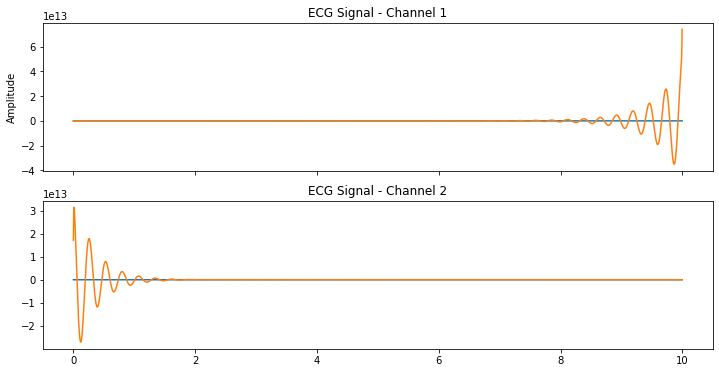

In [36]:
# Load ECG wave file (2 channels)
fs, ecg = wav.read('sig100.wav')
ecg_10s = ecg[:10*fs, :]  # Extract the first 10 seconds of the signal

# Define the order of the Bernstein polynomial
order = 1000

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s), axis=0)

# Read the key from file
with open('key.txt', 'rb') as f:
    key = f.read()

# Create a Fernet instance with the key
fernet = Fernet(key)

# --- Decryption ---
# Read the encrypted data from file
with open('encrypted_coeffs.txt', 'rb') as f:
    encrypted_data = f.read()

# Decrypt the data
decrypted_data = fernet.decrypt(encrypted_data)

# Convert the decrypted data back to a numpy array
coeffs = np.frombuffer(decrypted_data, dtype=np.float64)

# Reshape the coefficients array to a 2D array with 2 rows (one for each channel)
coeffs = coeffs.reshape((-1, 2), order='F')

# Define the Bernstein polynomial basis
t = np.linspace(0, 1, len(ecg_norm))
B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

# Reconstruct the normalized ECG signals for each channel using the decrypted coefficients
ecg_fit = np.zeros_like(ecg_norm)
for i in range(ecg_norm.shape[1]):
    coeffs_channel = coeffs[:, i]
    y_fit = np.dot(B.T, coeffs_channel)
    ecg_fit[:, i] = y_fit

# Denormalize the reconstructed ECG signals
ecg_recon = ecg_fit * np.max(np.abs(ecg_10s), axis=0)

# Compute the root-mean-square error (RMSE) between the original signal and the fitted signal for each channel
rmse = np.sqrt(np.mean((ecg_10s - ecg_recon)**2, axis=0))
print(f"RMSE between original and reconstructed ECG signals: {rmse}")

# Plot the original and reconstructed ECG signals for both channels
t = np.arange(ecg_10s.shape[0]) / fs
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
axs[0].plot(t, ecg_10s[:, 0], label='Original')
axs[0].plot(t, ecg_recon[:, 0], label='Reconstructed')
axs[0].set_title('ECG Signal - Channel 1')
axs[0].set_ylabel('Amplitude')
axs[1].plot(t, ecg_10s[:, 1], label='Original')
axs[1].plot(t, ecg_recon[:, 1], label='Reconstructed')
axs[1].set_title('ECG Signal - Channel 2')
